In [313]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [243]:
confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')

In [244]:
confirmed.head(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,...,860,889,910,934,950,962,973,982,986,987
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,...,342,352,366,372,375,380,381,387,393,395
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,...,505,518,529,537,544,551,553,555,560,567
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,...,267,272,279,281,285,287,290,292,293,293


In [245]:
recovered = pd.read_csv('time_series_covid_19_recovered.csv')
deaths = pd.read_csv('time_series_covid_19_deaths.csv')

In [246]:
deaths.head(4)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20
0,Anhui,Mainland China,31.82571,117.2264,0,0,0,0,0,0,...,4,4,5,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.18238,116.4142,0,0,0,0,0,1,...,3,3,3,3,4,4,4,4,4,4
2,Chongqing,Mainland China,30.05718,107.8740,0,0,0,0,0,0,...,3,3,4,5,5,5,5,5,5,6
3,Fujian,Mainland China,26.07783,117.9895,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [247]:
data = pd.read_csv('covid_19_data.csv')

In [248]:
data.shape

(3084, 8)

In [249]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [250]:
data.describe()

,SNo,Confirmed,Deaths,Recovered
count,3084.000000,3084.000000,3084.000000,3084.000000
mean,1542.500000,612.572633,17.466926,152.385214
std,890.418441,5092.995803,182.555887,1446.430660
min,1.000000,0.000000,0.000000,0.000000
25%,771.750000,2.000000,0.000000,0.000000
50%,1542.500000,10.000000,0.000000,1.000000
75%,2313.250000,121.000000,1.000000,18.000000
max,3084.000000,67103.000000,2803.000000,33934.000000


In [330]:
data['DateTime'] = pd.to_datetime(data['Last Update'])
data['Date'] = pd.to_datetime(data['ObservationDate'])
data['Date'] = data['Date'].dt.date

In [255]:
data.head(4)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,DateTime,Date
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22


In [256]:
data[data['Country/Region']=='New Zealand']

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,DateTime,Date
2682,2683,02/28/2020,NaN,New Zealand,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03,2020-02-28
2799,2800,02/29/2020,NaN,New Zealand,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03,2020-02-29
2925,2926,03/01/2020,NaN,New Zealand,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03,2020-03-01
3059,3060,03/02/2020,NaN,New Zealand,2020-02-28T16:23:03,1.0,0.0,0.0,2020-02-28 16:23:03,2020-03-02


In [257]:
def china_row(col):
    Country=col[0]
    if Country == "Mainland China":
        return "China"
    else:
        return "ROW"

In [258]:
data['China_ROW'] = data[['Country/Region']].apply(china_row,axis=1)

In [259]:
data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,DateTime,Date,China_ROW
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22,China
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22,China
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22,China
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22,China
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0,2020-01-22 17:00:00,2020-01-22,China


In [261]:
data_latest = pd.DataFrame(data.groupby(['Country/Region','Date'])['Confirmed','Recovered','Deaths'].sum()).reset_index()
data_latest = data_latest.sort_values(by=['Country/Region','Date'])
data_latest = data_latest.drop_duplicates(subset = ['Country/Region'],keep='last')
data_latest.head()

,Country/Region,Date,Confirmed,Recovered,Deaths
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
8,Afghanistan,2020-03-02,1.0,0.0,0.0
15,Algeria,2020-03-02,3.0,0.0,0.0
16,Andorra,2020-03-02,1.0,0.0,0.0
18,Armenia,2020-03-02,1.0,0.0,0.0


In [262]:
data_latest[data_latest['Country/Region']=='Mainland China']

,Country/Region,Date,Confirmed,Recovered,Deaths
646,Mainland China,2020-03-02,80026.0,44810.0,2912.0


In [348]:
fig = px.choropleth(data_latest,locations="Country/Region",locationmode='country names',color='Confirmed'
                   ,hover_data=['Confirmed','Recovered','Deaths'],color_continuous_scale="viridis",
                   title='Confirmed cases across the globe')
fig.show()

In [33]:
# EDA for cases in china

In [264]:
data_china = data[data['China_ROW'] == "China"]

In [265]:
data_china = pd.DataFrame(data_china.groupby(['Province/State','Date'])['Confirmed','Recovered','Deaths'].sum()).reset_index()

In [266]:
data_china.head()

,Province/State,Date,Confirmed,Recovered,Deaths
0,Anhui,2020-01-22,1.0,0.0,0.0
1,Anhui,2020-01-23,9.0,0.0,0.0
2,Anhui,2020-01-24,15.0,0.0,0.0
3,Anhui,2020-01-25,39.0,0.0,0.0
4,Anhui,2020-01-26,60.0,0.0,0.0


In [267]:
data_china = data_china.sort_values(by=['Province/State','Date'])

In [268]:
data_china.head()

,Province/State,Date,Confirmed,Recovered,Deaths
0,Anhui,2020-01-22,1.0,0.0,0.0
1,Anhui,2020-01-23,9.0,0.0,0.0
2,Anhui,2020-01-24,15.0,0.0,0.0
3,Anhui,2020-01-25,39.0,0.0,0.0
4,Anhui,2020-01-26,60.0,0.0,0.0


In [269]:
data_china_latest = data_china.drop_duplicates(subset = ['Province/State'],keep='last')

In [270]:
data_china['Recover_rate'] = (data_china.Recovered / data_china.Confirmed) *100
data_china.head()

,Province/State,Date,Confirmed,Recovered,Deaths,Recover_rate
0,Anhui,2020-01-22,1.0,0.0,0.0,0.0
1,Anhui,2020-01-23,9.0,0.0,0.0,0.0
2,Anhui,2020-01-24,15.0,0.0,0.0,0.0
3,Anhui,2020-01-25,39.0,0.0,0.0,0.0
4,Anhui,2020-01-26,60.0,0.0,0.0,0.0


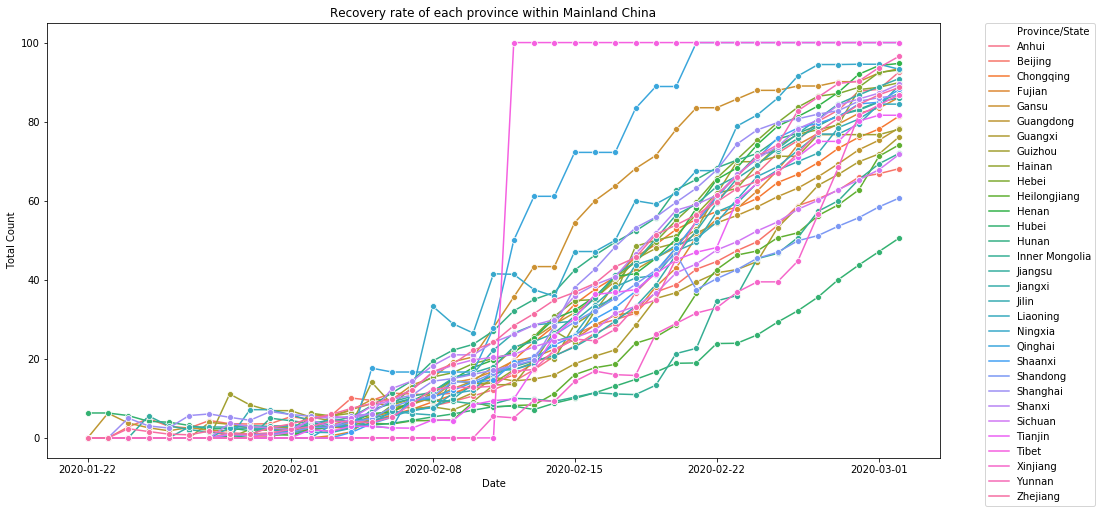

In [357]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=data_china,x='Date',y='Recover_rate',hue='Province/State',marker='o',ax=ax)

ax.set(xlabel='Date',ylabel='Total Count')
ax.set_title("Recovery rate of each province within Mainland China")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


In [273]:
df_china = pd.melt(data_china_latest[['Province/State','Confirmed','Recovered','Deaths']],id_vars='Province/State',var_name='Status',value_name='Count')

Text(0.5, 1.0, 'Current Status (Mainland China)')

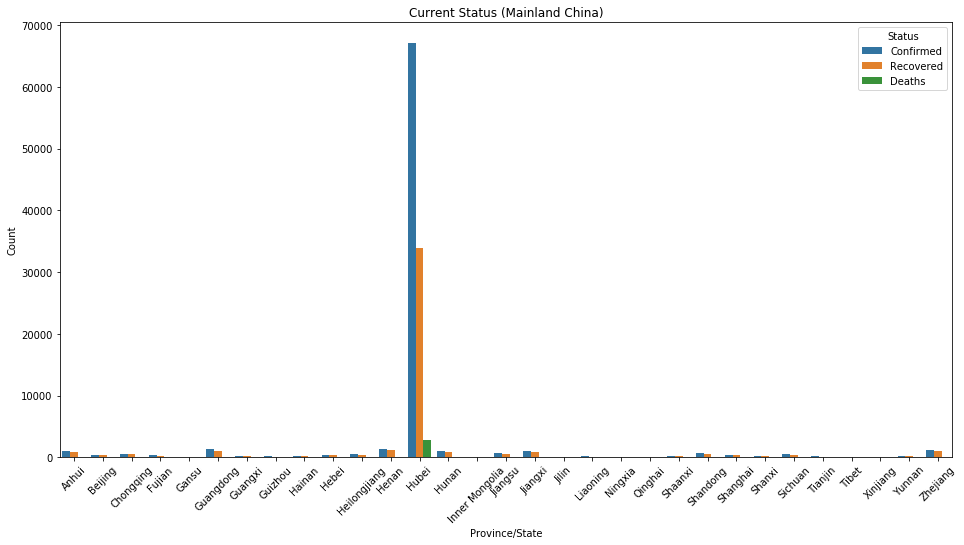

In [274]:
fig = plt.figure(figsize=(16,8))
ax = sns.barplot(x='Province/State',y='Count',hue='Status',data=df_china)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Current Status (Mainland China)")

In [275]:
df_hubei = data_china[data_china['Province/State'] == 'Hubei']

In [276]:
df_hubei.head()

,Province/State,Date,Confirmed,Recovered,Deaths,Recover_rate
492,Hubei,2020-01-22,444.0,28.0,17.0,6.306306
493,Hubei,2020-01-23,444.0,28.0,17.0,6.306306
494,Hubei,2020-01-24,549.0,31.0,24.0,5.646630
495,Hubei,2020-01-25,761.0,32.0,40.0,4.204993
496,Hubei,2020-01-26,1058.0,42.0,52.0,3.969754


In [277]:
df_hubei['day'] = df_hubei['Date'].dt.date

C:\Users\aksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [278]:
df_hubei.head()

,Province/State,Date,Confirmed,Recovered,Deaths,Recover_rate,day
492,Hubei,2020-01-22,444.0,28.0,17.0,6.306306,2020-01-22
493,Hubei,2020-01-23,444.0,28.0,17.0,6.306306,2020-01-23
494,Hubei,2020-01-24,549.0,31.0,24.0,5.646630,2020-01-24
495,Hubei,2020-01-25,761.0,32.0,40.0,4.204993,2020-01-25
496,Hubei,2020-01-26,1058.0,42.0,52.0,3.969754,2020-01-26


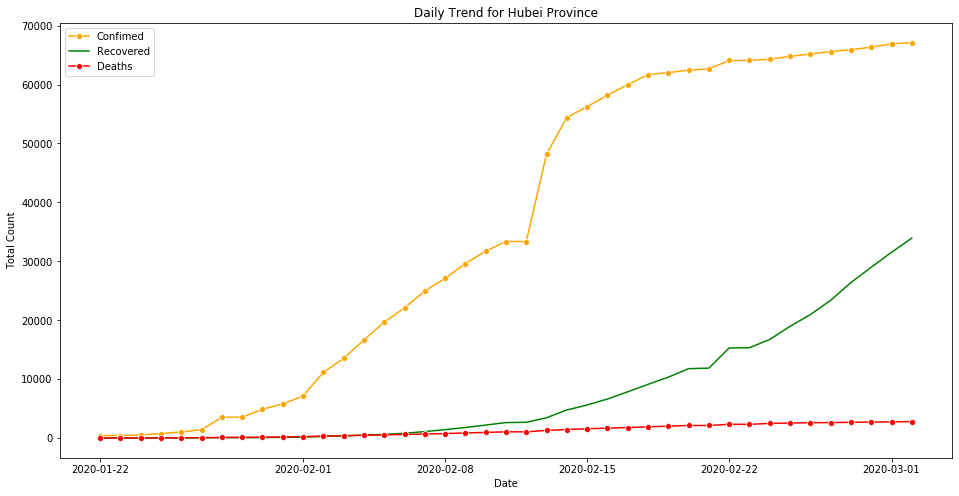

In [279]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=df_hubei,x='day',y='Confirmed',marker='o',ax=ax,color='Orange')
sns.lineplot(data=df_hubei,x='day',y='Recovered',ax=ax,color='g')
sns.lineplot(data=df_hubei,x='day',y='Deaths',marker='o',ax=ax,color='red')
ax.legend(['Confimed','Recovered','Deaths'])
ax.set(xlabel='Date',ylabel='Total Count')
ax.set_title("Daily Trend for Hubei Province")
plt.show()



In [103]:
# Rest of the world

In [332]:
data_row = data[data['China_ROW'] == "ROW"]
data_row = pd.DataFrame(data_row.groupby(['Country/Region','Date'])['Confirmed','Recovered','Deaths'].sum()).reset_index()
data_row = data_row.sort_values(by=['Country/Region','Date'])
data_row_latest = data_row.drop_duplicates(subset = ['Country/Region'],keep='last')

df_row_top = data_row_latest[data_row_latest['Confirmed'] > 49]
df_row = pd.melt(df_row_top[['Country/Region','Confirmed','Recovered','Deaths']],id_vars='Country/Region',var_name='Status',value_name='Count')
df_row.shape

(36, 3)

In [356]:
fig = px.choropleth(data_row_latest,locations="Country/Region",locationmode='country names',color='Confirmed'
                   ,hover_data=['Confirmed','Recovered','Deaths'],color_continuous_scale="viridis",
                   title='Confirmed cases across Rest of the world')
fig.show()

Text(0.5, 1.0, 'Current Status Rest of the World (50 or more confirmed)')

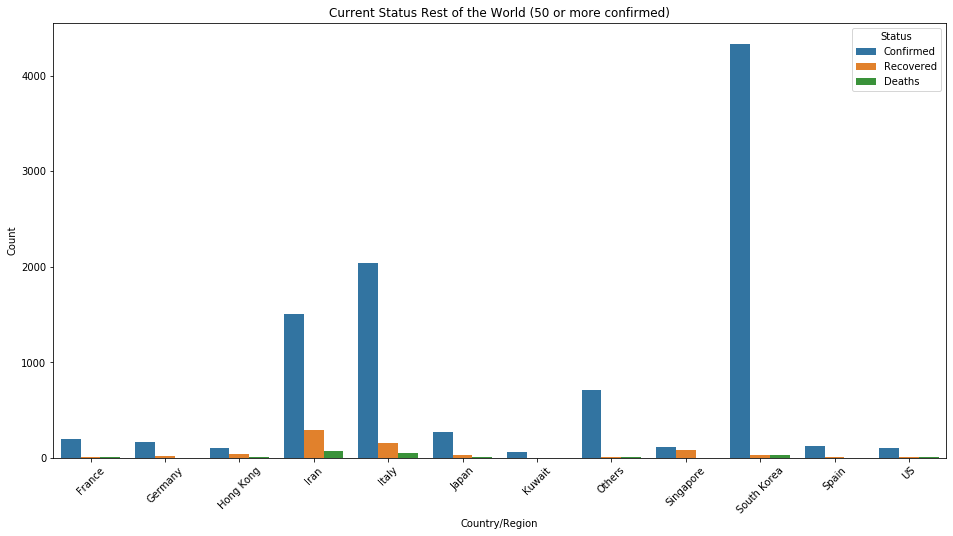

In [281]:
fig = plt.figure(figsize=(16,8))
ax = sns.barplot(x='Country/Region',y='Count',hue='Status',data=df_row)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title("Current Status Rest of the World (50 or more confirmed)")

In [282]:
data_china['day'] = data_china['Date'].dt.date

In [283]:
data_china.head()

,Province/State,Date,Confirmed,Recovered,Deaths,Recover_rate,day
0,Anhui,2020-01-22,1.0,0.0,0.0,0.0,2020-01-22
1,Anhui,2020-01-23,9.0,0.0,0.0,0.0,2020-01-23
2,Anhui,2020-01-24,15.0,0.0,0.0,0.0,2020-01-24
3,Anhui,2020-01-25,39.0,0.0,0.0,0.0,2020-01-25
4,Anhui,2020-01-26,60.0,0.0,0.0,0.0,2020-01-26


In [284]:
data_china_daily = pd.DataFrame(data_china.groupby(data_china['day'])['Confirmed','Recovered','Deaths'].sum()).reset_index()
data_china_daily.head()

,day,Confirmed,Recovered,Deaths
0,2020-01-22,547.0,28.0,17.0
1,2020-01-23,639.0,30.0,18.0
2,2020-01-24,916.0,36.0,26.0
3,2020-01-25,1399.0,39.0,42.0
4,2020-01-26,2062.0,49.0,56.0


In [285]:
data_row['day'] = data_row['Date'].dt.date
data_row.head()
data_row_daily = pd.DataFrame(data_row.groupby(data_row['day'])['Confirmed','Recovered','Deaths'].sum()).reset_index()
data_row_daily.head()

,day,Confirmed,Recovered,Deaths
0,2020-01-22,8.0,0.0,0.0
1,2020-01-23,14.0,0.0,0.0
2,2020-01-24,25.0,0.0,0.0
3,2020-01-25,39.0,0.0,0.0
4,2020-01-26,56.0,3.0,0.0


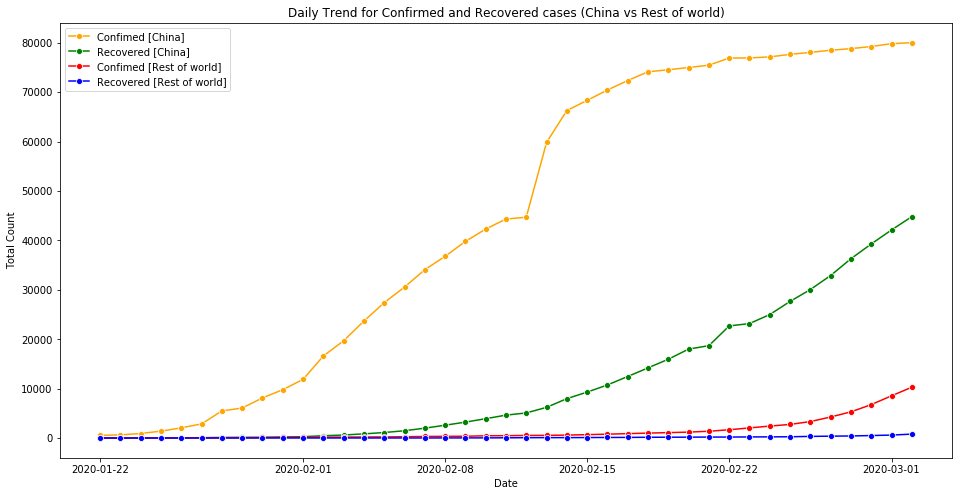

In [286]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=data_china_daily,x='day',y='Confirmed',marker='o',ax=ax,color='Orange')
sns.lineplot(data=data_china_daily,x='day',y='Recovered',marker='o',ax=ax,color='g')
sns.lineplot(data=data_row_daily,x='day',y='Confirmed',ax=ax,color='r',marker='o')
sns.lineplot(data=data_row_daily,x='day',y='Recovered',ax=ax,color='b',marker='o')
#sns.lineplot(data=df_hubei,x='day',y='Deaths',marker='o',ax=ax,color='red')
ax.legend(['Confimed [China]','Recovered [China]','Confimed [Rest of world]','Recovered [Rest of world]'])
ax.set(xlabel='Date',ylabel='Total Count')
ax.set_title("Daily Trend for Confirmed and Recovered cases (China vs Rest of world)")
plt.show()

In [287]:
data_row_daily['Mortality'] = data_row_daily.Deaths / data_row_daily.Confirmed
data_china_daily['Mortality'] = data_china_daily.Deaths / data_china_daily.Confirmed
data_row_daily.head()

,day,Confirmed,Recovered,Deaths,Mortality
0,2020-01-22,8.0,0.0,0.0,0.0
1,2020-01-23,14.0,0.0,0.0,0.0
2,2020-01-24,25.0,0.0,0.0,0.0
3,2020-01-25,39.0,0.0,0.0,0.0
4,2020-01-26,56.0,3.0,0.0,0.0


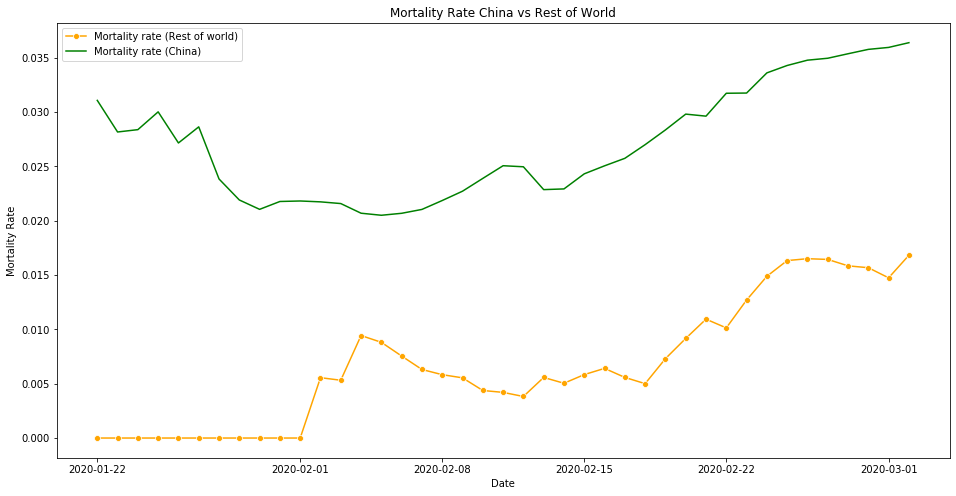

In [288]:
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(data=data_row_daily,x='day',y='Mortality',marker='o',ax=ax,color='Orange')
sns.lineplot(data=data_china_daily,x='day',y='Mortality',ax=ax,color='g')

ax.legend(['Mortality rate (Rest of world)','Mortality rate (China)'])
ax.set(xlabel='Date',ylabel='Mortality Rate')
#ax.set(xticks=data_china_daily.day.values)

ax.set_title("Mortality Rate China vs Rest of World")
plt.show()

In [289]:
import plotly.express as px

In [290]:
data_row_latest.head()

,Country/Region,Date,Confirmed,Recovered,Deaths
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
8,Afghanistan,2020-03-02,1.0,0.0,0.0
15,Algeria,2020-03-02,3.0,0.0,0.0
16,Andorra,2020-03-02,1.0,0.0,0.0
18,Armenia,2020-03-02,1.0,0.0,0.0


In [291]:
fig = px.treemap(data_row_latest,path=['Country/Region'],values='Deaths',
                title="Latest number of deaths outside china",
                color_discrete_sequence=px.colors.qualitative.Prism)
fig.show()